# Performance Evaluation Methods

**Aim**: The aim of this notebook is understand the various performance evaluation methods that can be used to evaluate your model. 

## Table of contents

1. Performance evaluation methods for classification algorithms
2. Performance evaluation methods for regression algorithms 
3. Performance evaluation methods for unsupervised algorithms


## Package Requirements

In [187]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
plt.rc("font", size=14)

### 1. Read the dataset & drop columns with NA values.


In [188]:
data = pd.read_csv('data/org_banking.txt', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


### 2. Data conversion.
We will convert basic education of different types into one type.This should reduce the cardinality of `education` feature.

In [189]:
data['education']=np.where(data['education'] =='basic.9y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'basic', data['education'])

In [190]:
data['education'].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [191]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Percentage of subscription", pct_of_sub*100)

Percentage of no subscription is 88.73458288821988
Percentage of subscription 11.265417111780131


### 3. Quick preview of the data.
The data that we have indeed has a lot of string values and we will have to convert them to numreical values.
This can be done using Onehotencoding.


In [192]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


#### 4. Remove co-linear features
It is always a good idea to remove the co-linear feautures. The following code snippet removes co-linear features.

In [193]:
# Create correlation matrix
corr_matrix = data.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
data.drop(data[to_drop], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,nr_employed,y
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,5228.1,0
41184,31,housemaid,married,basic,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,5017.5,0


### 5. Split the data in test and train.

In [194]:
y = data.y.values
X_df = data.drop(columns=['y'],axis=1)

#### Label Encodings
There are two popular ways to do this: label encoding and one hot encoding.

For label encoding, a different number is assigned to each unique value in the feature column. A potential issue with this method would be the assumption that the label sizes represent ordinality (i.e. a label of 3 is greater than a label of 1).

For one hot encoding, a new feature column is created for each unique value in the feature column. The value would be 1 if the value was present for that observation and 0 otherwise. 
This method however could easily lead to an explosion in number of features and lead to the curse of dimensionality.

In [195]:
# Label encode categorical variables.
label_encoder = LabelEncoder()
mappings = []

# Desired label orders for categorical columns.
educ_order = ['unknown', 'illiterate','basic', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.
def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)

# Use dummy variables for occupation
X_df = pd.concat([X_df, pd.get_dummies(X_df['job'])],axis=1).drop('job',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(X_df, 'education', educ_order)
ordered_labels(X_df, 'month', month_order)
ordered_labels(X_df, 'day_of_week', day_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(X_df):
    #If the data is of type string,apply LabelEncoding
    if X_df[col].dtype == 'object':
        X_df[col] = label_encoder.fit_transform(np.array(X_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

X_train, X_test, y_train, y_test = train_test_split(X_df,y,test_size=0.3)

### 6. Train a Logistic Regression.

In [196]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.cluster import KMeans

## Performance evaluation methods for classification algorithms

**Building the K-Nearest Neighbors Model**

![KNN](images/knn.png)

KNN is a type of lazy learner , which can be used for both classification and regression.

* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

In [197]:
# Building the K-NN Classifier 

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Building the Logistic Regression Model**

In [198]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegressionCV(max_iter=5000)
#Fitting the model to the training and test sets
logistic_regression.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=5000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

**Confusion Matrix**
![CM](images/confusion_matrix2.png)

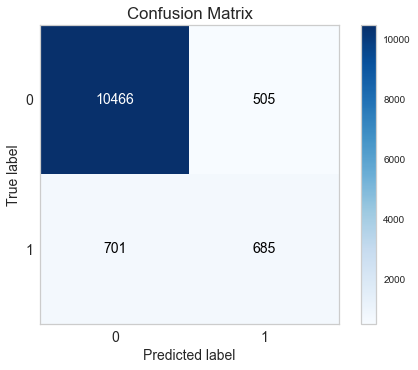

In [199]:
import matplotlib.pyplot as plt
import scikitplot as skplt

#Normalized confusion matrix for the K-NN model

prediction_labels = knn_classifier.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels)
plt.show()

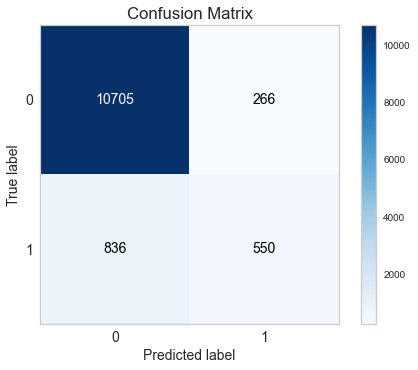

In [200]:
from sklearn.metrics import confusion_matrix
#Creating predictions on the test set 
#Normalized confusion matrix for the K-NN model

prediction_labels = logistic_regression.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels)
plt.show()

In [221]:
prediction_proba = logistic_regression.predict_proba(X_test)
prediction_proba

array([[0.98778339, 0.01221661],
       [0.96609186, 0.03390814],
       [0.99072863, 0.00927137],
       ...,
       [0.97480625, 0.02519375],
       [0.98677094, 0.01322906],
       [0.47487859, 0.52512141]])

In [222]:
prediction = logistic_regression.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

**KNN - Normalized Confusion Matrix**

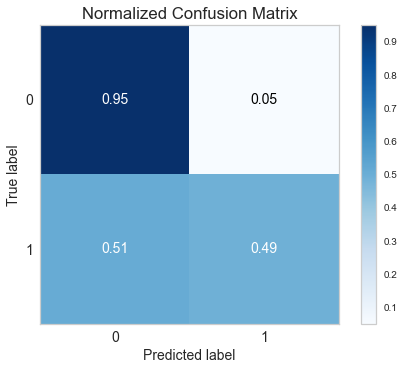

In [201]:
#Normalized confusion matrix for the KNN model
prediction_labels = knn_classifier.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels, normalize=True)
plt.show()

**LR- Normalized Confusion Matrix**

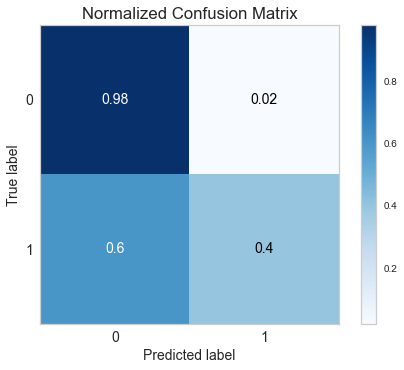

In [202]:
#Normalized confusion matrix for the logistic regression model
prediction_labels = logistic_regression.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, prediction_labels, normalize=True)
plt.show()

**Area under the curve**

True Positive Rate 

![True Positive Rate](images/True_Positive_Rate_web.png)

False Positive Rate

![FPR](images/False_Positive_Rate_web.png)

Area Under the Curve - ROC


![AUC](images/Area_Under_The_Curve_web.png)

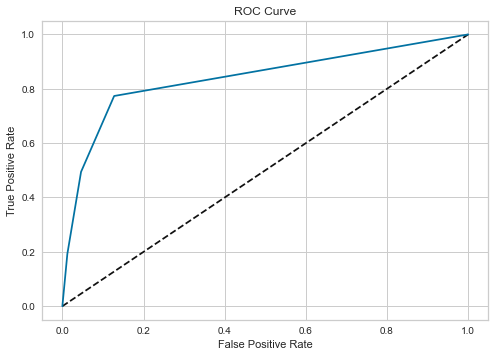

0.8380456123141384

In [223]:
#Probabilities for each prediction output 
target_prob = knn_classifier.predict_proba(X_test)[:,1]
#Plotting the ROC curve 
fpr, tpr, thresholds = roc_curve(y_test,target_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
#Computing the auc score 
roc_auc_score(y_test, target_prob)

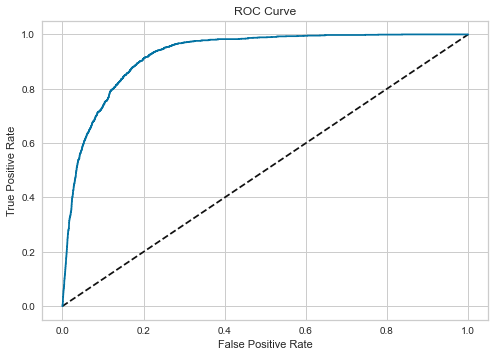

0.9252937331963857

In [225]:
#Probabilities for each prediction output 

target_prob = logistic_regression.predict_proba(X_test)[:,1]
#Plotting the ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, target_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
#Computing the auc score 
roc_auc_score(y_test, target_prob)

Precision :

![Precision](images/Precision_web.png)

Of the samples the model has predicted to be positive,how many of them are actually positive.

Recall :
![Recall](images/Recall_web.png)

Of all the positive lables,how many of them the model is able to classify correctly.

In [205]:
#Creating the classification report 
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     10971
           1       0.11      0.10      0.10      1386

    accuracy                           0.81     12357
   macro avg       0.50      0.50      0.50     12357
weighted avg       0.80      0.81      0.81     12357



In [206]:
lr_y_test_proba = logistic_regression.predict_proba(X_test)[:,1]

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test,lr_y_test_proba)

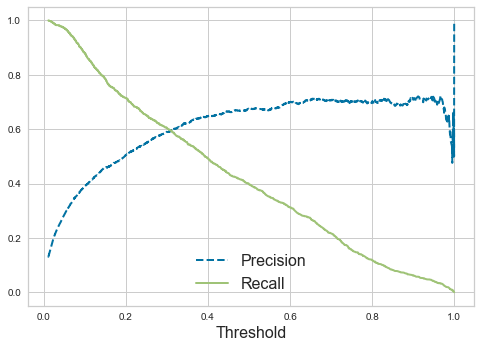

In [207]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="best", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown      
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)

F1 Score

![F1](images/F1_Score_web.png)


**Learning Curve**

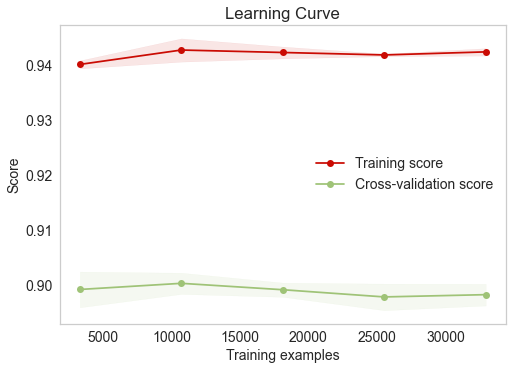

In [208]:
#Learning curve for the K-NN model
skplt.estimators.plot_learning_curve(knn_classifier,X_df,y)
plt.show()

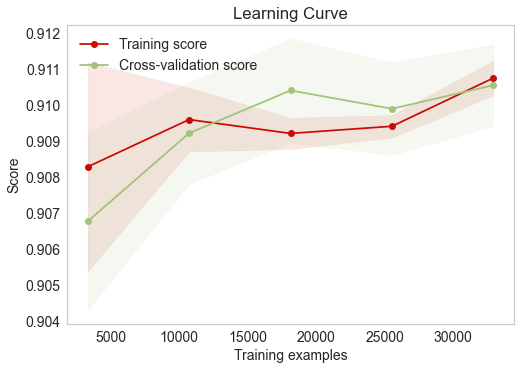

In [209]:
#Learning curve for the LR model
skplt.estimators.plot_learning_curve(logistic_regression,X_df,y)
plt.show()

**Cross-validated box plot**

In [210]:
#List of models
models = [('k-NN', knn_classifier),('LR', logistic_regression)]

/Users/anilkumarpanda/SoftwareInstalls/anaconda/envs/ml_course/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/anilkumarpanda/SoftwareInstalls/anaconda/envs/ml_course/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


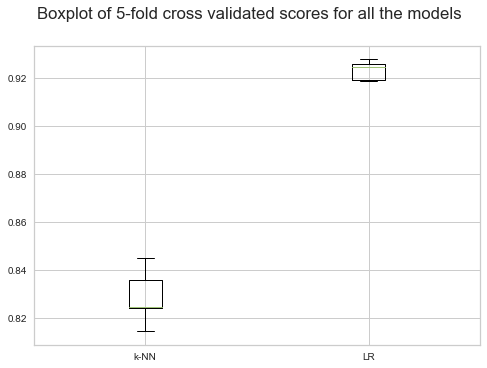

In [229]:
#Initializing empty lists in order to store the results
cv_scores = []
model_name_list = []

for name, model in models:
    
    #5-fold cross validation
    cv_5 = model_selection.KFold(n_splits= 5, random_state= 50)
    # Evaluating the accuracy scores
    cv_score = model_selection.cross_val_score(model, X_test, y_test, cv = cv_5, scoring='roc_auc')
    cv_scores.append(cv_score)
    model_name_list.append(name)
    
# Plotting the cross-validated box plot 

fig = plt.figure()
fig.suptitle('Boxplot of 5-fold cross validated scores for all the models')
ax = fig.add_subplot(111)
plt.boxplot(cv_scores)
ax.set_xticklabels(model_name_list)
plt.show()

## Performance Evaluation methods for regression algorithms

**Building a linear regression model**

In [232]:
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import warnings

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
# Load data
boston = load_boston()
X = boston.data
y = boston.target

In [233]:
pd.DataFrame(X,columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [234]:
#Initializing a linear regression model 
linear_reg = linear_model.LinearRegression()
#Fitting the model on the data
linear_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
predictions = linear_reg.predict(X)

**Computing the Mean Absoloute Error**

In [216]:
metrics.mean_absolute_error(y, predictions)

3.270862810900316

**Computing the Mean Squared Error**

In [217]:
metrics.mean_squared_error(y, predictions)

21.894831181729202

**Computing the Root Mean Squared Error**

In [230]:
np.sqrt(metrics.mean_squared_error(y, predictions))

4.679191295697281

R Squared

Measure how much of the variance is capturd by the model.

Variance- it measures how far a set of (random) numbers are spread out from their average value.

![R-squared](images/R-Squared_web.png)

In [236]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

0.7406426641094095